<a href="https://colab.research.google.com/github/syma-afsha/Multi_Arm_Bandit_epsilion_greedy_action_value/blob/main/Multi_Arm_Bandit_epsilion_greedy_action_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets assume the doctor needs to select most effective treatment.

So the doctor has three treatment. For example, for the first treatment, action 1, second treatment action 2 , and third treatment action 3.

Each treatment outcome is the recovery from the disease.

Every patient has different body, that's why his or her body reacts differently.

If we treatment with the same treatment then we will get different results for every patient.

So the more positive outcome means maximum reward. Higher the reward more effective the treatment is.



The multi-armed bandit (MAB) problem refers to a specific type of decision-making problem, about learning and making decisions under uncertainty to achieve the best possible outcome over time..


In the multi-armed bandit (MAB) problem, the agent does not initially know which arm provides the maximum reward.



### Why is it Called "Multi-Armed Bandit"?

The name comes from the analogy of a gambler facing multiple slot machines ("one-armed bandits"). Each machine offers a different but unknown payout probability.

 The gambler's challenge is to decide:

- Which machine to play next.
- How to balance playing machines that seem promising (to win more money) with trying less-played machines (to discover potentially better ones).


So the multi arm bandit problem aims at finding the sequence of actions that will maximize the total expected  rewards over a certain time period.



##### Exploitation: selecting the action (or arm) that is believed to provide the highest reward based on past experience.


Imagine you are choosing between three arms with the following average observed rewards:

Arm A: Average reward=5

Arm B: Average reward=3

Arm C: Average reward=4

If you choose exploitation, you will select Arm A because it has the highest average reward based on your past observations.


Risk:
### If your past experience is limited then future decisions will be sub-optimal.

While exploitation can provide high rewards in the short term, it risks missing out on potentially better options that haven't been sufficiently explored.




##### Exploration: Trying out less-tested or seemingly suboptimal actions to discover their reward potential.

Imagine you have three arms:

Arm A: Tested 50 times, average reward = 5.
Arm B: Tested 10 times, average reward = 6.
Arm C: Tested 5 times, average reward = 4.

If you choose exploration, you might try Arm B or Arm C despite their lower confidence in average reward, as they havent been tested enough to confidently assess their potential.

Risk: Exploration may result in lower rewards in the short term, as the agent is deliberately choosing arms that may not provide the highest known rewards.


The trade off between Explotation and Exploration:











## Epsilion Greedy Action Value Method for solving k bandit prolem


In [124]:
import numpy as np


In [125]:
import numpy as np

class BanditProblem:
    def __init__(self, trueActionValue, epsilion, totalSteps):
        # Initialize parameters
        self.trueActionValue = trueActionValue
        self.epsilion = epsilion
        self.totalSteps = totalSteps
        self.currentStep = 0
        self.armnumber = np.size(trueActionValue)

        # Tracking variables
        self.howManyTimeParticularArmIsSelected = np.zeros(self.armnumber)
        self.armMeanRewards = np.zeros(self.armnumber)
        self.currentReward = 0
        self.meanReward = np.zeros(totalSteps + 1)
        self.armMeanRewardsHistory = np.zeros((self.armnumber, totalSteps + 1))

    def SelectAction(self):
        # Epsilon-greedy action selection
        probability = np.random.rand()
        if (self.currentStep == 0) or (probability <= self.epsilion):
            selectArmIndex = np.random.choice(self.armnumber)  # Explore
        else:
            selectArmIndex = np.argmax(self.armMeanRewards)  # Exploit

        # Update current step and arm selection count
        self.currentStep += 1
        self.howManyTimeParticularArmIsSelected[selectArmIndex] += 1

        # Simulate reward
        self.currentReward = np.random.normal(self.trueActionValue[selectArmIndex], 2)

        # Update arm mean rewards
        self.armMeanRewards[selectArmIndex] += (
            1 / self.howManyTimeParticularArmIsSelected[selectArmIndex]
        ) * (self.currentReward - self.armMeanRewards[selectArmIndex])

        # Update mean reward progression
        self.meanReward[self.currentStep] = self.meanReward[self.currentStep - 1] + (
            1 / self.currentStep
        ) * (self.currentReward - self.meanReward[self.currentStep - 1])

        # Track arm-specific mean reward progression
        for arm in range(self.armnumber):
            self.armMeanRewardsHistory[arm, self.currentStep] = self.armMeanRewards[arm]

    def playTime(self):
        # Simulate the bandit problem
        for _ in range(self.totalSteps):
            self.SelectAction()

    def clearAll(self):
        # Reset variables to original state
        self.currentStep = 0
        self.howManyTimeParticularArmIsSelected = np.zeros(self.armnumber)
        self.armMeanRewards = np.zeros(self.armnumber)
        self.currentReward = 0
        self.meanReward = np.zeros(self.totalSteps + 1)
        self.armMeanRewardsHistory = np.zeros((self.armnumber, self.totalSteps + 1))


In [126]:
import matplotlib.pyplot as plt

In [127]:
# Define true action values, epsilon values, and total steps
actionValues = np.array([1, 4, 2, 0, 7, 1, -1])
epsilion_values = np.array([0, 0.1, 0.2, 0.3])
totalSteps = 100000

# List to store bandit instances
bandit = []

# Run simulations
for eps in epsilion_values:
    bandit_instance = BanditProblem(actionValues, eps, totalSteps)
    bandit.append(bandit_instance)
    bandit_instance.playTime()
print(bandit[0].howManyTimeParticularArmIsSelected)
print(bandit[1].howManyTimeParticularArmIsSelected)
print(bandit[2].howManyTimeParticularArmIsSelected)
print(bandit[3].howManyTimeParticularArmIsSelected)

# print(bandit[0].armMeanRewards)
# print(bandit[1].armMeanRewards)
# print(bandit[2].armMeanRewards)
# print(bandit[3].armMeanRewards)
print("Mean Rewards....")
print(bandit[0].meanReward)
print(bandit[1].meanReward)
print(bandit[2].meanReward)
print(bandit[3].meanReward)






[     0.      0.      0.      0. 100000.      0.      0.]
[ 1453.  1388.  1498.  1384. 91466.  1384.  1427.]
[ 2920.  2850.  2896.  2893. 82711.  2821.  2909.]
[ 4211.  4397.  4377.  4252. 74171.  4284.  4308.]
Mean Rewards....
[0.         6.64142873 4.79509119 ... 7.00028205 7.00028402 7.000286  ]
[0.         3.33845578 2.56395729 ... 6.5070383  6.50704505 6.50697142]
[0.         0.81167092 2.85206569 ... 5.99203991 5.99206661 5.99207527]
[ 0.         -3.45033515 -0.79830735 ...  5.49102346  5.49104084
  5.49106181]


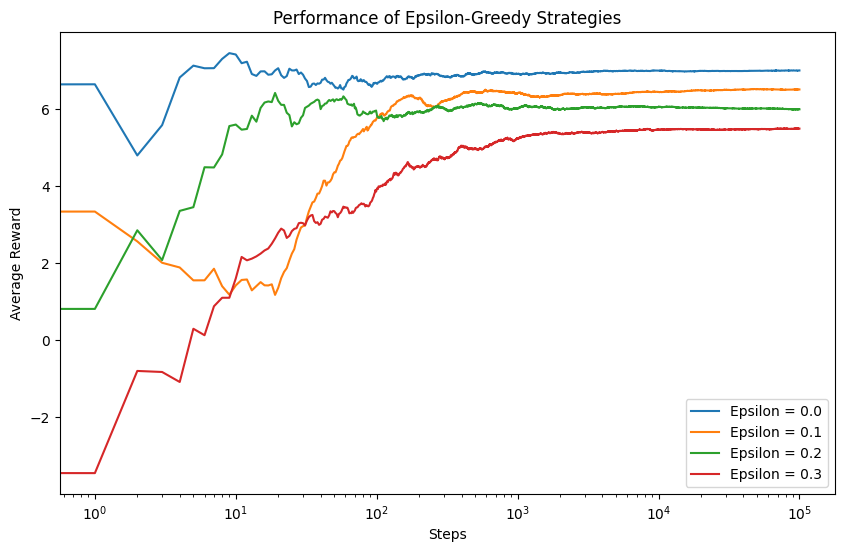

In [128]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot mean rewards for each epsilon
for i in range(len(epsilion_values)):
    plt.plot(
        np.arange(bandit[i].totalSteps + 1),
        bandit[i].meanReward,  # Use meanReward for overall reward progression
        label=f"Epsilon = {epsilion_values[i]}"
    )

# Set logarithmic scale for the x-axis
plt.xscale("log")

# Labels and legend
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Performance of Epsilon-Greedy Strategies')
plt.legend()

# Save the plot
plt.savefig('results.png', dpi=300)

# Display the plot
plt.show()


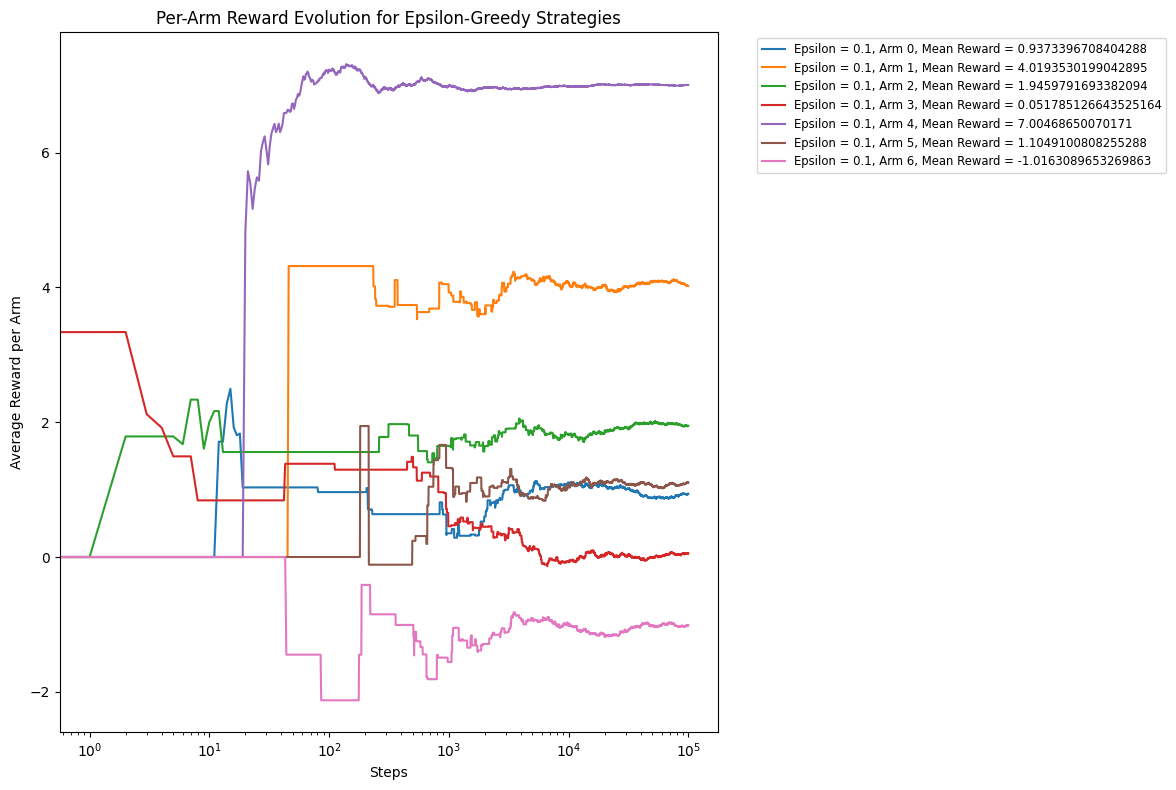

In [129]:
plt.figure(figsize=(12, 8))

# Plot rewards for each arm and each epsilon

# Access armnumber using dot operator (.)
for arm in range(bandit[1].armnumber):
    plt.plot(
        np.arange(bandit[1].totalSteps + 1),
        bandit[1].armMeanRewardsHistory[arm],  # Use the history for plotting
        label=f"Epsilon = {epsilion_values[1]}, Arm {arm}, Mean Reward = {bandit[1].armMeanRewards[arm]}"
    )

# Set logarithmic scale for the x-axis
plt.xscale("log")


# Labels and legend
plt.xlabel('Steps')
plt.ylabel('Average Reward per Arm')
plt.title('Per-Arm Reward Evolution for Epsilon-Greedy Strategies')
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize="small")

# Display the plot
plt.tight_layout()
plt.show()

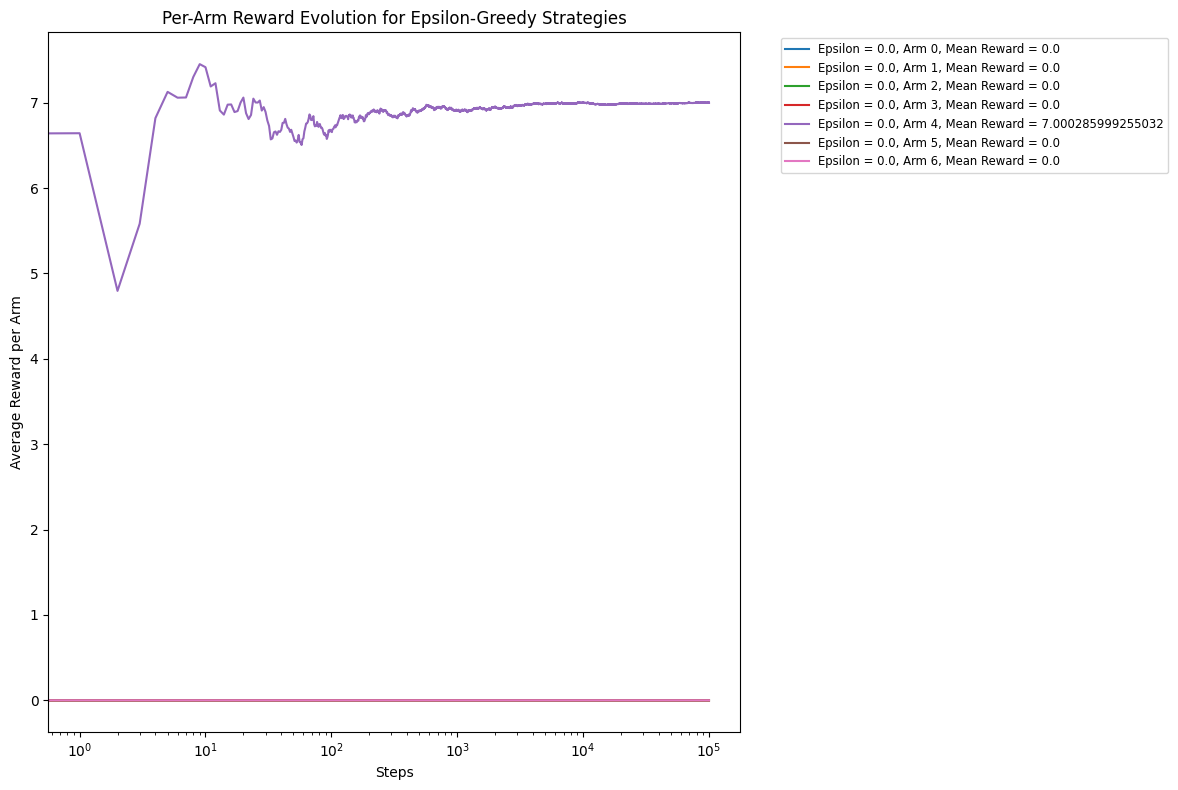

In [130]:
plt.figure(figsize=(12, 8))

# Plot rewards for each arm and each epsilon

# Access armnumber using dot operator (.)
for arm in range(bandit[0].armnumber):
    plt.plot(
        np.arange(bandit[0].totalSteps + 1),
        bandit[0].armMeanRewardsHistory[arm],  # Use the history for plotting
        label=f"Epsilon = {epsilion_values[0]}, Arm {arm}, Mean Reward = {bandit[0].armMeanRewards[arm]}"
    )

# Set logarithmic scale for the x-axis
plt.xscale("log")


# Labels and legend
plt.xlabel('Steps')
plt.ylabel('Average Reward per Arm')
plt.title('Per-Arm Reward Evolution for Epsilon-Greedy Strategies')
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize="small")

# Display the plot
plt.tight_layout()
plt.show()